In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
import collections
import matplotlib.pyplot as plt
import sys
sys.path.append('../lib')
import visuals as vs

%matplotlib inline

%run ../src/load_deskew.py

In [2]:
features = ['FireplaceQu_None','FirstFlrSF','ExterQual_TA',
            'Fireplaces_0','FullBath_1','YearRemodAdd',
            'KitchenQual_TA','Foundation_PConc',
            'GarageCars_3','ExterQual_Gd','SalePrice']

In [3]:
whos DataFrame

Variable             Type         Data/Info
-------------------------------------------
housing_df           DataFrame         MSSubClass MSZoning <...>n[1451 rows x 80 columns]
housing_num_df       DataFrame          LotFrontage  LotAre<...>n[1451 rows x 24 columns]
housing_one_hot_df   DataFrame          LotFrontage   LotAr<...>[1451 rows x 383 columns]
housing_orig_df      DataFrame         MSSubClass MSZoning <...>n[1451 rows x 80 columns]
listing_df           DataFrame            Id Street Alley  <...>n[1460 rows x 62 columns]
numeric_data_df      DataFrame          LotFrontage  LotAre<...>n[1451 rows x 24 columns]
numeric_log_df       DataFrame          LotFrontage    LotA<...>n[1451 rows x 24 columns]
numeric_scaled_df    DataFrame          LotFrontage   LotAr<...>n[1451 rows x 24 columns]
sale_df              DataFrame            Id  MoSold  YrSol<...>\n[1460 rows x 6 columns]
zoning_df            DataFrame            Id  MSSubClass MS<...>n[1460 rows x 15 columns]


In [4]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(housing_one_hot_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

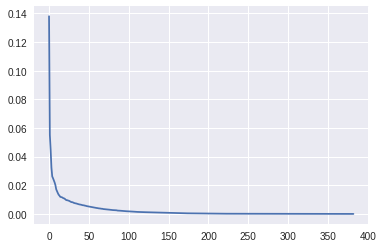

In [5]:
plt.plot(pca.explained_variance_ratio_)

In [6]:
pca = PCA(6)
pca.fit(housing_one_hot_df[features])

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

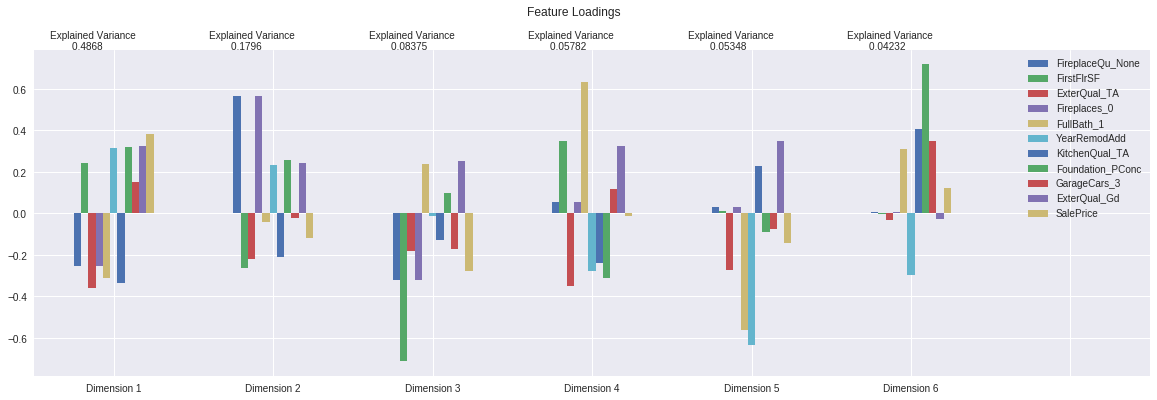

In [7]:
gelman_loading_plot = vs.FeatureLoadingsPlot(housing_one_hot_df[features], pca, 6)
gelman_loading_plot.display_segments()

## Dimension 1 (Move-In Readiness)
This first principal component describes the most common type of home for sale in Ames, Iowa. In particular, it is a single family home that has been recently remodeled to have a better curb appeal for a higher sale price.

## Dimension 2 (Starter Home1)
This component describes smaller homes with more than 1 bathroom and do not have a fireplace. These homes are more affordable than homes in Dimension 1. This would be marketed towards people who value more bathrooms over a fireplace.

## Dimension 3 (Starter Home2)
A small affordable home that has some curb appeal. These homes could be marketed towards buyers who value a fireplace over additional bathrooms.

 50%|█████     | 2/4 [00:00<00:00, 15.92it/s]

For n_clusters = 2 the silhouette score is 0.3991043380111585.
For n_clusters = 3 the silhouette score is 0.37863166709076235.
For n_clusters = 4 the silhouette score is 0.39083112051912083.


100%|██████████| 4/4 [00:00<00:00, 14.10it/s]


For n_clusters = 5 the silhouette score is 0.3506214910911993.


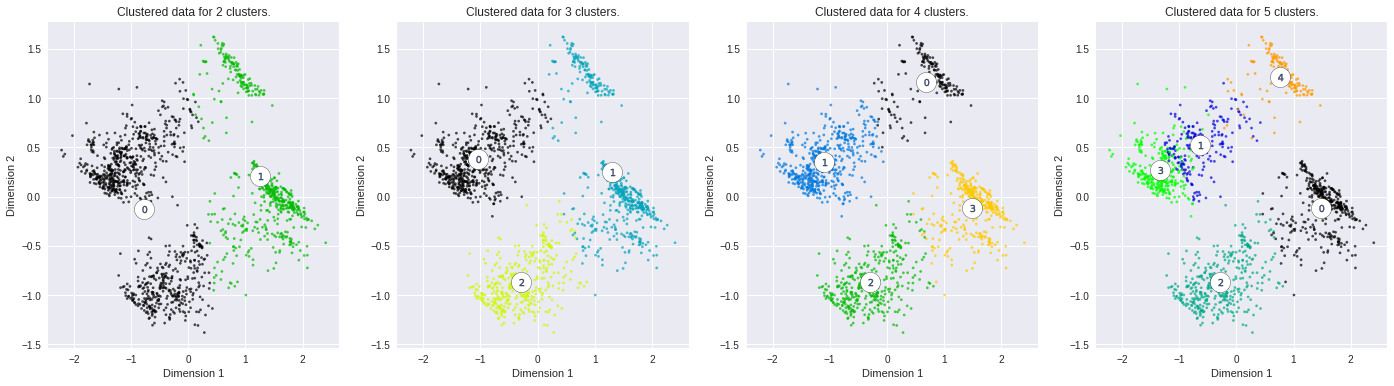

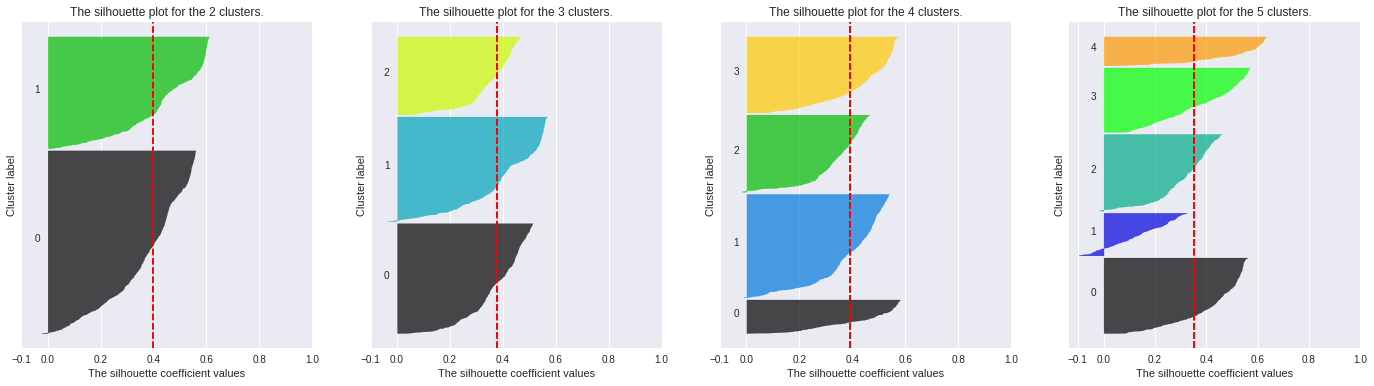

In [8]:
dims_6 = ['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4', 'Dimension 5', 'Dimension 6']
gelman_pca_df = pd.DataFrame(pca.transform(housing_one_hot_df[features]))
gelman_pca_df.columns = dims_6

gelman_pca_clusters = vs.Clusters(gelman_pca_df, [2,3,4,5])
gelman_pca_clusters.cluster_plots()
gelman_pca_clusters.silhouette_plots()